<a href="https://colab.research.google.com/github/PARTH264/Fake-News-Detection/blob/main/Copy_of_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parth264","key":"869fadf5b312a744c976b6dd27863bc0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d saurabhshahane/fake-news-classification

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
License(s): Attribution 4.0 International (CC BY 4.0)
 90% 83.0M/92.1M [00:00<00:00, 130MB/s]
100% 92.1M/92.1M [00:00<00:00, 110MB/s]


In [ ]:
!unzip fake-news-classification.zip

Archive:  fake-news-classification.zip
  inflating: WELFake_Dataset.csv     


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/WELFake_Dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Fill missing 'title' and 'text' with an empty string
df["title"].fillna("", inplace=True)
df["text"].fillna("", inplace=True)

df.isna().sum()

<ipython-input-11-bae88dd62b1f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["title"].fillna("", inplace=True)
<ipython-input-11-bae88dd62b1f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

,0
Unnamed: 0,0
title,0
text,0
label,0


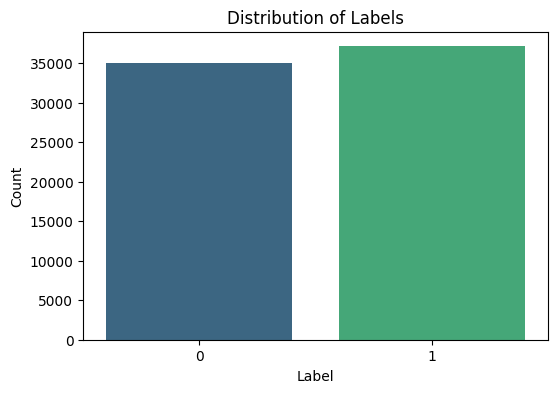

Label Counts:
 label
1    37106
0    35028
Name: count, dtype: int64


In [ ]:
# Count occurrences of each label
label_counts = df["label"].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, dodge=False, palette="viridis", legend=False)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.xticks(rotation=0)
plt.show()

print("Label Counts:\n", label_counts)

# **Text Preprocessing and Cleaning Pipeline**


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
lemmatizer = WordNetLemmatizer()

# Download NLTK resources
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # 1: Lowercasing
    text = text.lower()

    # 2: Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3: Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 4: Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # 6: Tokenization
    tokens = word_tokenize(text)

    # 6: Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])

    # 7: Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # 8: Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    return text
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                text  \
0  No comment is expected from Barack Obama Membe...   
1     Did they post their votes for Hillary already?   
2   Now, most of the demonstrators gathered last ...   
3  A dozen politically active pastors came here f...   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...   

                                        cleaned_text  
0  comment expected barack obama member fyf fukyo...  
1                          post vote hillary already  
2  demonstrator gathered last night exercising co...  
3  dozen politically active pastor came private d...  
4  r sarmat missile dubbed satan replace s fly mi...  


# **Word Cloud Visualization of Cleaned Text Data**

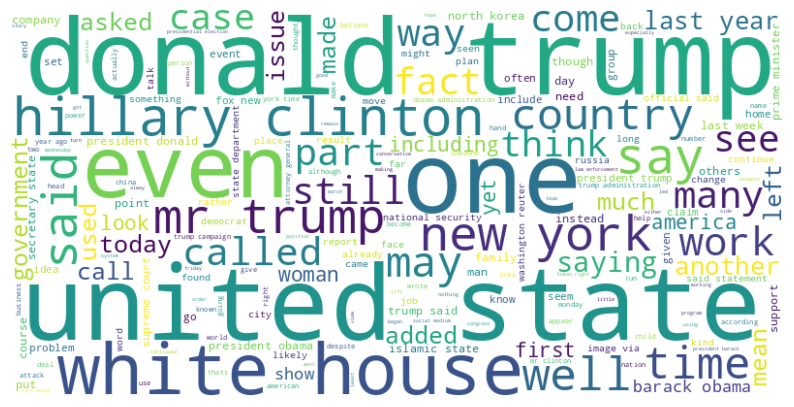

In [ ]:
all_text = ' '.join(df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Bag of Words (BoW) Feature Extraction**

In [ ]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000)

bow_features = count_vectorizer.fit_transform(df['cleaned_text'])

bow_df = pd.DataFrame(bow_features.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display Bag of Words features
print("Bag of Words Features:\n", bow_df.head())

df = df.join(bow_df, rsuffix='_bow')

print(df.head())

Bag of Words Features:
    ability  able  access  according  account  accused  across  act  action  \
0        0     0       0          0        0        0       0    0       0   
1        0     0       0          0        0        0       0    0       0   
2        0     0       0          0        0        0       0    0       0   
3        0     0       0          0        0        0       0    1       3   
4        0     1       0          1        0        0       0    0       0   

   activist  ...  would  wrong  wrote  year  yearold  yes  yet  york  young  \
0         0  ...      2      0      0     0        0    0    0     0      1   
1         0  ...      0      0      0     0        0    0    0     0      0   
2         0  ...      0      0      0     0        0    0    0     0      0   
3         4  ...      4      0      0     4        0    0    1     0      1   
4         0  ...      1      0      0     0        0    0    0     0      0   

   youre  
0      0  
1      0  

In [ ]:
print("Columns in bow_df:", bow_df.columns)
print("Data types of bow_df:\n", bow_df.dtypes)

Columns in bow_df: Index(['ability', 'able', 'access', 'according', 'account', 'accused',
       'across', 'act', 'action', 'activist',
       ...
       'would', 'wrong', 'wrote', 'year', 'yearold', 'yes', 'yet', 'york',
       'young', 'youre'],
      dtype='object', length=1000)
Data types of bow_df:
 ability      int64
able         int64
access       int64
according    int64
account      int64
             ...  
yes          int64
yet          int64
york         int64
young        int64
youre        int64
Length: 1000, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X = df.drop(columns=['title', 'text', 'label', 'cleaned_text'])
X = X.join(bow_df.add_suffix('_bow'), how='inner')

y = df['label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (57707, 2001)
Shape of X_test: (14427, 2001)
Shape of y_train: (57707,)
Shape of y_test: (14427,)


# **Machine learning Models**

# **Deep Learning Models**

# **Comparison**